# Finite State Machine Builder

This notebook will show how to use the Finite State Machine (FSM) builder to generate a state machine.

### Step 1 : Download overlay

With the overlay downloaded, users have to specify the state machine in a specific format.

In [1]:
from pynq import Overlay
Overlay('interface.bit').download()

In [2]:
fsm_spec = {'inputs': [('reset','D0'), ('direction','D1')],
        'outputs': [('bit2','D3'), ('bit1','D4'), ('bit0','D5')],
        'states': ['S0', 'S1', 'S2', 'S3', 'S4', 'S5'],
        'transitions': [['00', 'S0', 'S1', '000'],
                        ['01', 'S0', 'S5', '000'],
                        ['00', 'S1', 'S2', '001'],
                        ['01', 'S1', 'S0', '001'],
                        ['00', 'S2', 'S3', '010'],
                        ['01', 'S2', 'S1', '010'],
                        ['00', 'S3', 'S4', '011'],
                        ['01', 'S3', 'S2', '011'],
                        ['00', 'S4', 'S5', '100'],
                        ['01', 'S4', 'S3', '100'],
                        ['00', 'S5', 'S0', '101'],
                        ['01', 'S5', 'S4', '101'],
                        ['1-', '*',  'S0', '']]}

### Step 2 : Instantiate FSM builder
Internally the `fsm_spec` will be parsed. Users can also explicitly call 
```python
fsm.parse_fsm_spec(fsm_spec)
```
to parse the FSM state machine manually.

To use the analyzer at the same time, specify `use_analyzer=True`.

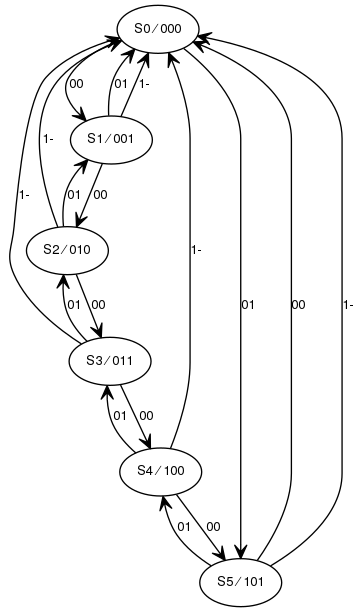

In [3]:
from pynq.lib.intf import FSMBuilder
from pynq.lib.intf import ARDUINO

fsm = FSMBuilder(ARDUINO, fsm_spec, num_analyzer_samples=64)
fsm.show_state_diagram()

### Step 3 : Run the FSM
The following example shows how to use the FSM. There are two options:

1. If we connect both `D0` and `D1` to `GND`, then the counter will count up.
2. If we connect `D0` to `GND`, and `D1` to `Vref`, then the counter will count down.

In [4]:
fsm.start()
fsm.show_waveform()

### Step 4: Stop the FSM
Calling `stop()` will clear the logic values on output pins; however, the waveform will be recorded locally in the FSM instance.

The trace buffer will also get cleared automatically.

In [5]:
fsm.stop()

### Step 5: Use state bits
If users want the state bits to be shown as output as well, `use_state_bits` has to be set to `True`. If there are not enough output pins, the last few output pins will be used for the state bits (replacing the ones users have specified).

In [6]:
from pprint import pprint

fsm_spec = {'inputs': [('rst','D0'), ('direction','D1')],
        'outputs': [('overflow','D2')],
        'states': ['S0', 'S1', 'S2', 'S3'],
        'transitions': [['00', 'S0', 'S1', '0'],
                        ['01', 'S0', 'S3', '0'],
                        ['00', 'S1', 'S2', '0'],
                        ['01', 'S1', 'S0', '0'],
                        ['00', 'S2', 'S3', '0'],
                        ['01', 'S2', 'S1', '0'],
                        ['00', 'S3', 'S0', '1'],
                        ['01', 'S3', 'S2', '1'],
                        ['1-', '*',  'S0', '']]}

fsm = FSMBuilder(ARDUINO, fsm_spec, 
                 use_state_bits=True, 
                 num_analyzer_samples=64)
pprint(fsm.fsm_spec)

{'inputs': [('rst', 'D0'), ('direction', 'D1')],
 'outputs': [('overflow', 'D2'), ('state_bit1', 'D4'), ('state_bit0', 'D3')],
 'states': ['S0', 'S1', 'S2', 'S3'],
 'transitions': [['00', 'S0', 'S1', '000'],
                 ['01', 'S0', 'S3', '000'],
                 ['00', 'S1', 'S2', '001'],
                 ['01', 'S1', 'S0', '001'],
                 ['00', 'S2', 'S3', '010'],
                 ['01', 'S2', 'S1', '010'],
                 ['00', 'S3', 'S0', '111'],
                 ['01', 'S3', 'S2', '111'],
                 ['1-', '*', 'S0', '']]}


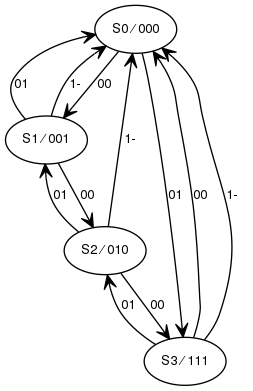

In [7]:
fsm.show_state_diagram()

In [8]:
fsm.start()
fsm.show_waveform()

In [9]:
fsm.stop()